In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\surfd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\surfd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

# Inital exploration of the data

In [2]:
df = pd.read_csv('./data/labeled_comments.csv')
df24 = pd.read_csv('./data/labeled_comments_2024.csv')

In [3]:
print(df.shape)
print(df24.shape)

(198, 9)
(200, 9)


Create datasets for those specifically within the Democrat and Republican subreddits for comparative analysis.

In [4]:
ddf = df.loc[df['subreddit'] == "democrats"]
rdf = df.loc[df['subreddit'] == "Republican"]

ddf24 = df24.loc[df24['subreddit'] == "democrats"]
rdf24 = df24.loc[df24['subreddit'] == "Republican"]

In [5]:
print(ddf.shape)
print(rdf.shape)

(99, 9)
(99, 9)


## 2020 Election Cycle Reddit Posts

### Wordcloud

In [6]:
# collect stopwords from the wordcloud library
stopwords = set(STOPWORDS)

In [7]:
def find_all_words(df):
    # tokenize each word within a review
    df['tokenized text'] = df['text'].apply(lambda text: word_tokenize(text))
    df['tokenized text'].head()

    # find all the nouns and adjectives within each review
    all_distinct_words = []
    for tokens in df['tokenized text']:
        tagged_tokens = nltk.pos_tag(tokens)
        distinct_words = [word for word, pos in tagged_tokens if pos.startswith('JJ') or pos.startswith('NN')]
        all_distinct_words.extend(distinct_words)

    # add in words that aren't stopwords or parts of contractions (bc the contractions got tokenized by symbol)
    distinct_words = [word for word in all_distinct_words if word.lower() not in stopwords and len(word) != 1 and word !="’" and word !="•"]
    return distinct_words

def find_most_common_words(distinct_words):
    words_counts = Counter(distinct_words)
    most_common_words = words_counts.most_common(10)
    print(most_common_words)

distinct_words = find_all_words(df)
find_most_common_words(distinct_words)

[('president', 136), ('Trump', 127), ('people', 121), ('President', 71), ('police', 57), ('Biden', 55), ('good', 44), ('country', 42), ('black', 40), ('years', 36)]


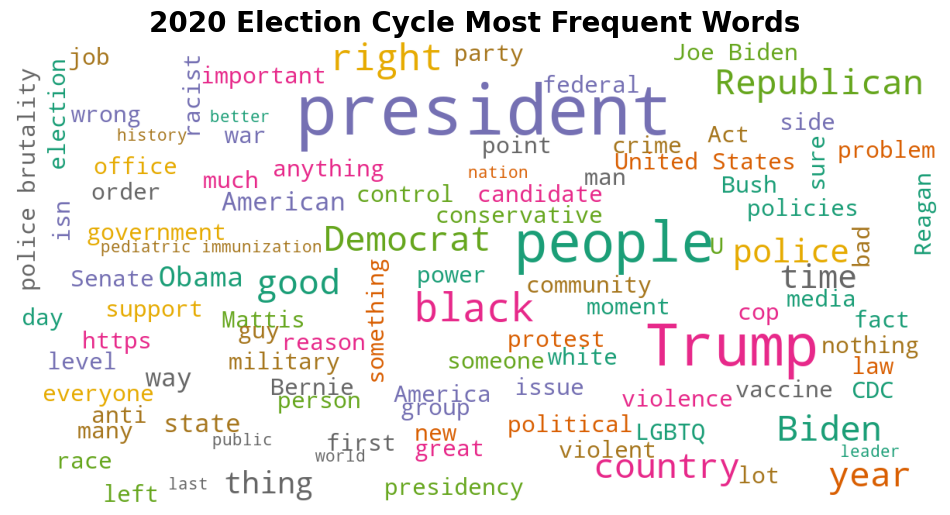

In [8]:
# generate word cloud using the inputed word list data
def show_wordcloud(data, title, colormap):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        colormap=colormap)
    
    wordcloud=wordcloud.generate(' '.join(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.show()

show_wordcloud(distinct_words, "2020 Election Cycle Most Frequent Words", "Dark2")

C:\Users\surfd\AppData\Local\Temp\ipykernel_6304\784081451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized text'] = df['text'].apply(lambda text: word_tokenize(text))


[('president', 67), ('people', 60), ('Trump', 53), ('Biden', 38), ('police', 33), ('President', 32), ('LGBTQ+', 22), ('years', 16), ('time', 15), ('good', 15)]


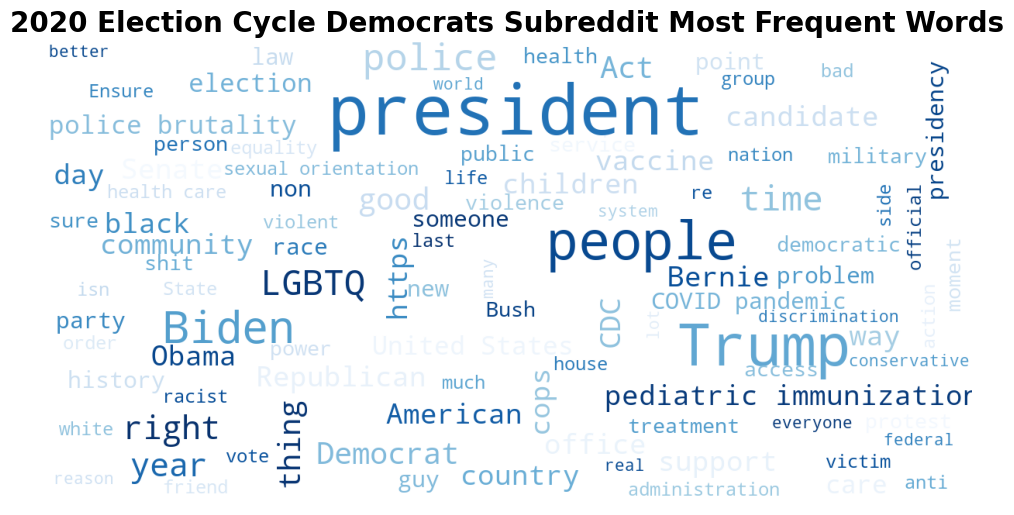

In [9]:
ddistinct_words = find_all_words(ddf)
find_most_common_words(ddistinct_words)
show_wordcloud(ddistinct_words, "2020 Election Cycle Democrats Subreddit Most Frequent Words", "Blues_r")

C:\Users\surfd\AppData\Local\Temp\ipykernel_6304\784081451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized text'] = df['text'].apply(lambda text: word_tokenize(text))


[('Trump', 74), ('president', 69), ('people', 61), ('President', 39), ('country', 29), ('good', 29), ('black', 28), ('police', 24), ('years', 20), ('Obama', 20)]


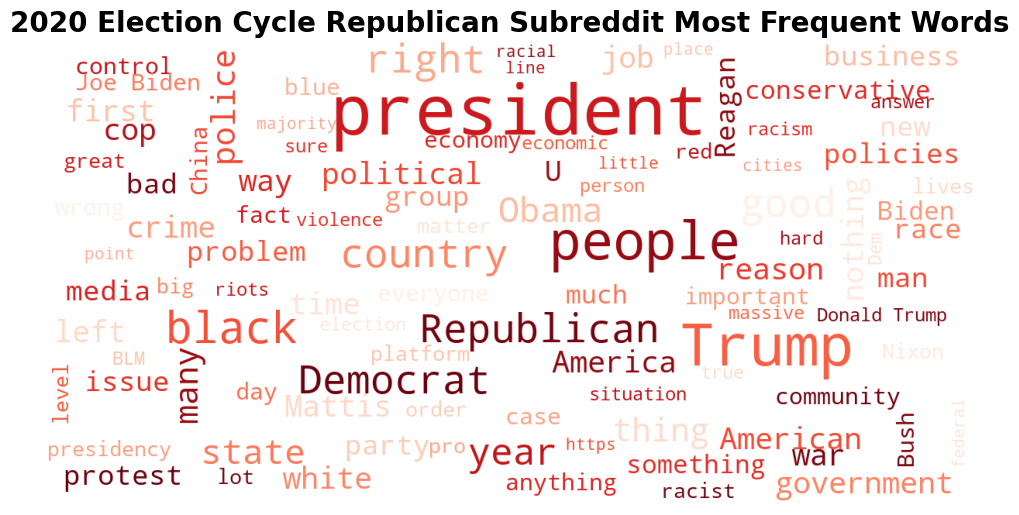

In [10]:
rdistinct_words = find_all_words(rdf)
find_most_common_words(rdistinct_words)
show_wordcloud(rdistinct_words, "2020 Election Cycle Republican Subreddit Most Frequent Words", "Reds_r")

### Ground Truth Label Analysis

#### Pie Chart

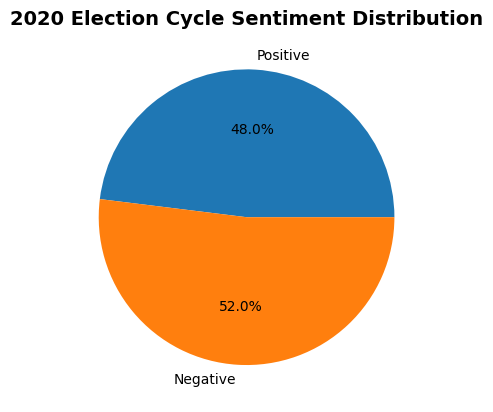

Total positive comments: 86
Total negative comments: 93


In [11]:
# Create pie chart of positive and negative scores
def show_piechart(df, title):
    plt.pie([(df['sentiment'] == 'positive').sum(), (df['sentiment'] == 'negative').sum()], labels=['Positive', 'Negative'], autopct='%1.1f%%')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.show()

    print("Total positive comments:", (df['sentiment'] == 'positive').sum())
    print("Total negative comments:", (df['sentiment'] == 'negative').sum())

show_piechart(df, '2020 Election Cycle Sentiment Distribution')

#### Compound Score Distribution

In [12]:
# Find general statistics of the compound score distribution
print(df["compound"].describe(),'\n')

count    198.000000
mean      -0.042811
std        0.649940
min       -0.998500
25%       -0.657325
50%        0.000000
75%        0.542300
max        0.995500
Name: compound, dtype: float64 



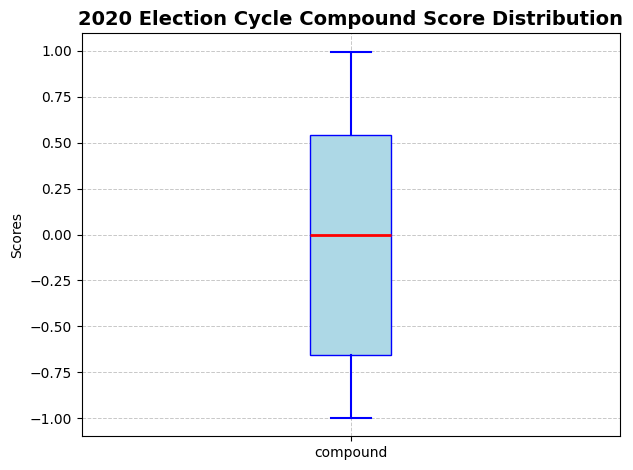

In [13]:
# Create box plot with the SET review compound scores
def show_boxplot(df, title):
    df["compound"].plot.box(
        patch_artist=True,  # Enable custom colors
        boxprops=dict(facecolor='lightblue', color='blue'),  # box
        medianprops=dict(color='red', linewidth=2),  # median line
        whiskerprops=dict(color='blue', linewidth=1.5),  # whiskers
        capprops=dict(color='blue', linewidth=1.5),  # caps
        flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
    )

    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel('Scores')

    # Customizing the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Adding some padding
    plt.tight_layout()

    plt.show()

show_boxplot(df, "2020 Election Cycle Compound Score Distribution")

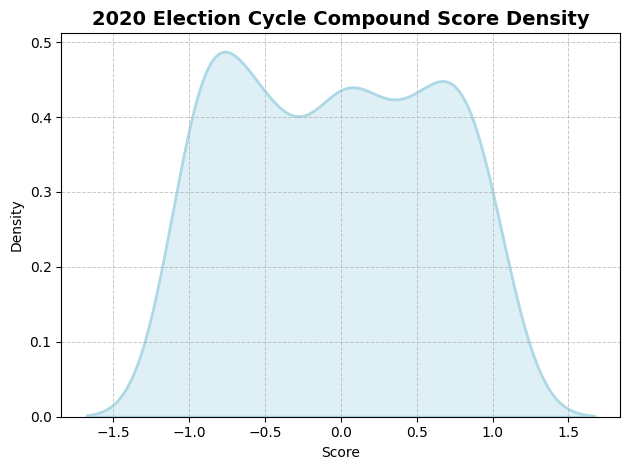

In [14]:
# Create a kernel density plot for the compound score
def show_kde(df, title):
    sns.kdeplot(df["compound"], 
                color='lightblue',  # Set line color
                fill=True,  # Fill under the KDE curve
                alpha=0.4,  # Transparency of the fill
                linewidth=2)  # Thickness of the line

    # Add title and labels
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Score')  # X-axis label
    plt.ylabel('Density')  # Y-axis label

    # Add a grid with custom style
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Improve layout
    plt.tight_layout()

    # Display the plot
    plt.show()

show_kde(df, "2020 Election Cycle Compound Score Density")

## 2024 Election Cycle Reddit Posts

[('president', 115), ('Trump', 97), ('President', 91), ('Biden', 73), ('people', 64), ('election', 34), ('party', 34), ('crime', 29), ('Democrats', 29), ('presidency', 27)]


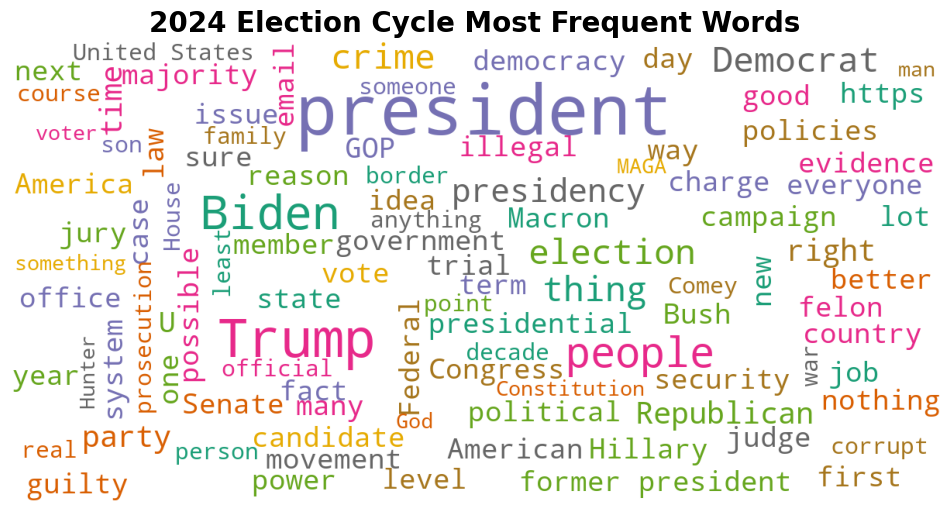

In [15]:
distinct_words = find_all_words(df24)
find_most_common_words(distinct_words)
show_wordcloud(distinct_words, "2024 Election Cycle Most Frequent Words", "Dark2")

C:\Users\surfd\AppData\Local\Temp\ipykernel_6304\784081451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized text'] = df['text'].apply(lambda text: word_tokenize(text))


[('president', 66), ('Trump', 37), ('President', 31), ('people', 25), ('Biden', 24), ('election', 19), ('presidency', 17), ('Bush', 16), ('things', 12), ('former', 12)]


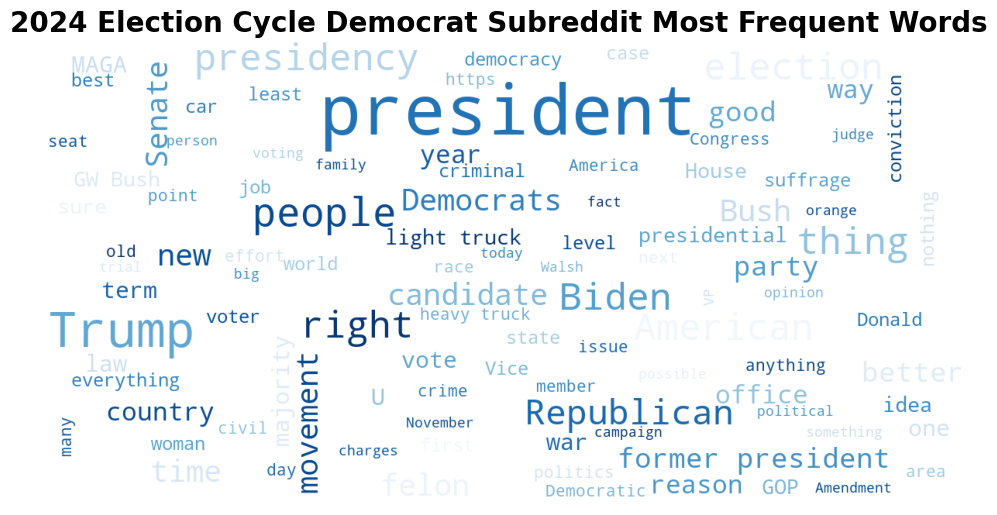

In [16]:
ddistinct_words = find_all_words(ddf24)
find_most_common_words(ddistinct_words)
show_wordcloud(ddistinct_words, "2024 Election Cycle Democrat Subreddit Most Frequent Words", "Blues_r")

C:\Users\surfd\AppData\Local\Temp\ipykernel_6304\784081451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized text'] = df['text'].apply(lambda text: word_tokenize(text))


[('President', 60), ('Trump', 60), ('Biden', 49), ('president', 49), ('people', 39), ('party', 27), ('crime', 26), ('system', 19), ('emails', 18), ('government', 18)]


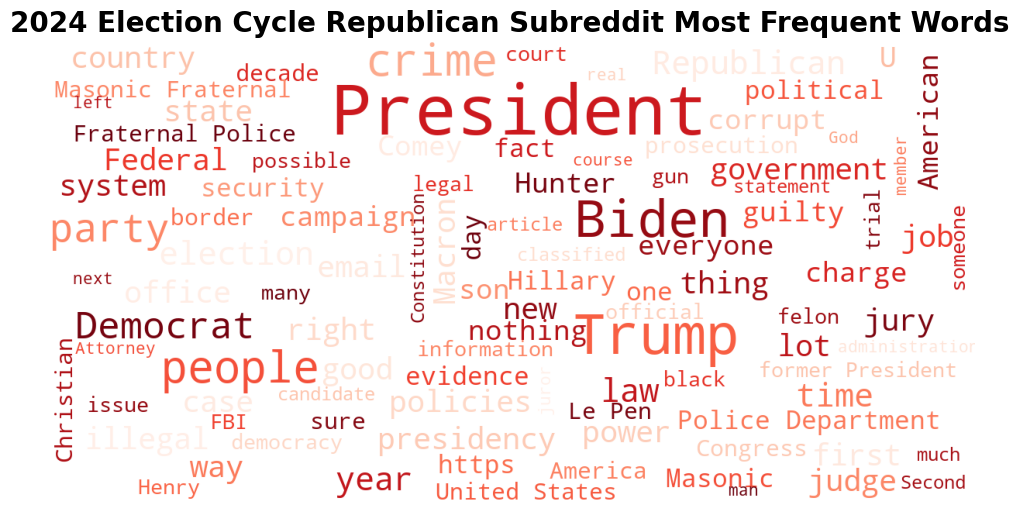

In [17]:
rdistinct_words = find_all_words(rdf24)
find_most_common_words(rdistinct_words)
show_wordcloud(rdistinct_words, "2024 Election Cycle Republican Subreddit Most Frequent Words", "Reds_r")

### Ground Truth Label Analysis

#### Pie Chart

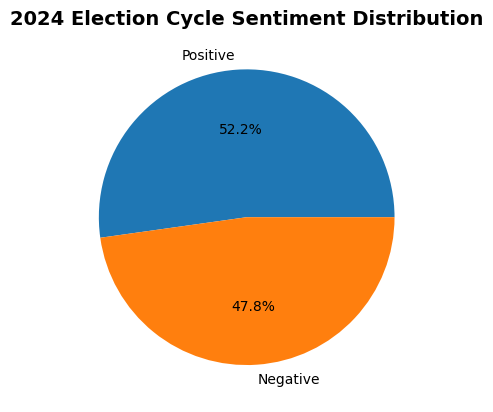

Total positive comments: 94
Total negative comments: 86


In [18]:
show_piechart(df24, "2024 Election Cycle Sentiment Distribution")

#### Compound Score Distribution

In [19]:
# Find general statistics of the compound score distribution
print(df24["compound"].describe(),'\n')

count    200.000000
mean      -0.006381
std        0.625867
min       -0.996300
25%       -0.632475
50%        0.000000
75%        0.526825
max        0.998700
Name: compound, dtype: float64 



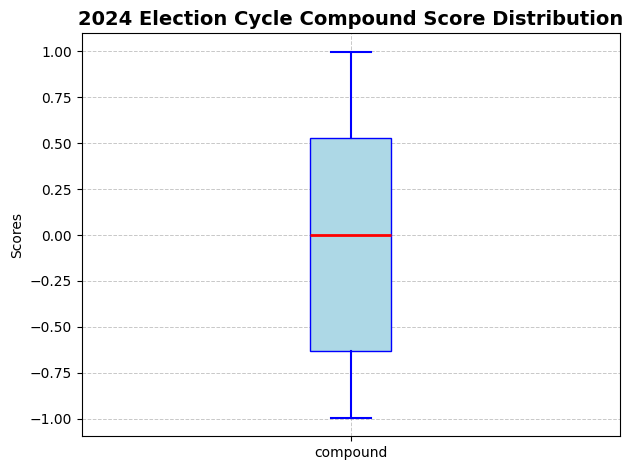

In [20]:
show_boxplot(df24, "2024 Election Cycle Compound Score Distribution")

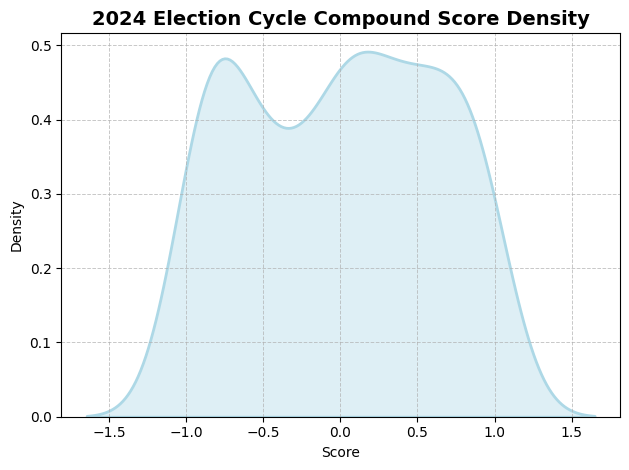

In [21]:
show_kde(df24, "2024 Election Cycle Compound Score Density")